In [1]:
#  TIME SERIES FORECASTING :- Forecast future trends
import pandas as pd 
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset
data = pd.read_csv('Miles_Traveled.csv')

# Convert the 'DATE' column to datetime format and set it as the index
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)

# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display missing values count
missing_values

TRFVOLUSM227NFWA    0
dtype: int64

In [3]:
# Splitting the data into training and test sets (80% train, 20% test)
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit an ARIMA model to the training data
model = ARIMA(train, order=(5, 1, 0))  # (p=5, d=1, q=0) based on typical assumptions
arima_model = model.fit()

# Forecast the values on the test set
forecast = arima_model.forecast(steps=len(test))

# Calculate RMSE to evaluate the model
rmse = np.sqrt(mean_squared_error(test, forecast))

rmse

D:\xampp\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\xampp\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\xampp\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


39593.70122845739

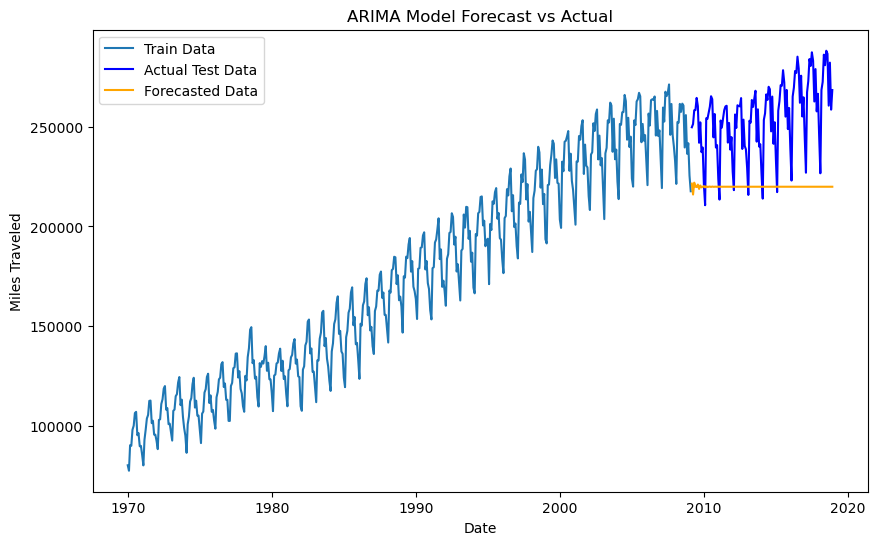

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Train Data')
plt.plot(test.index, test, label='Actual Test Data', color='blue')
plt.plot(test.index, forecast, label='Forecasted Data', color='orange')
plt.title('ARIMA Model Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Miles Traveled')
plt.legend()
plt.show()


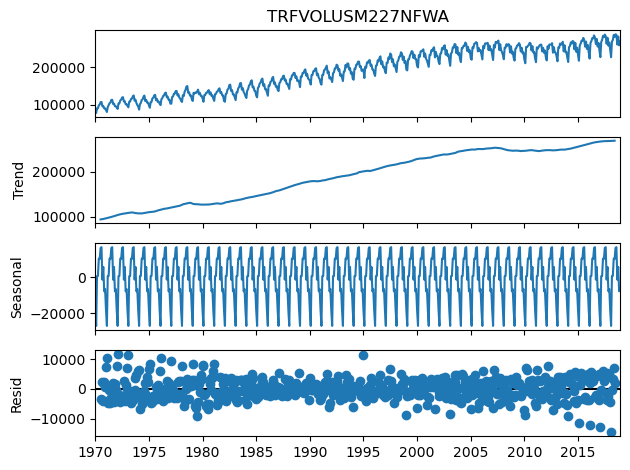

In [14]:
# Decompose the time series
decomposition = seasonal_decompose(data['TRFVOLUSM227NFWA'], model='additive', period=12)
decomposition.plot()
plt.show()

<Figure size 1000x600 with 0 Axes>

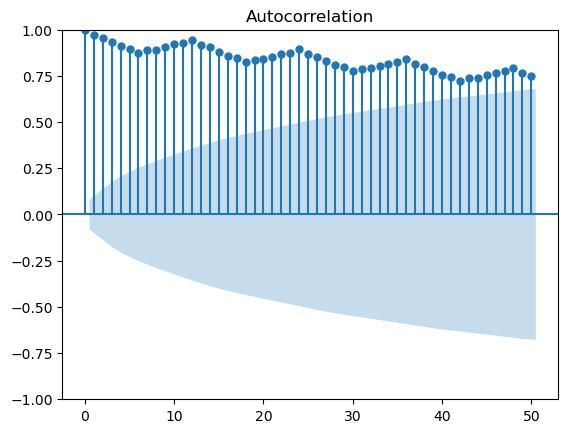

<Figure size 1000x600 with 0 Axes>

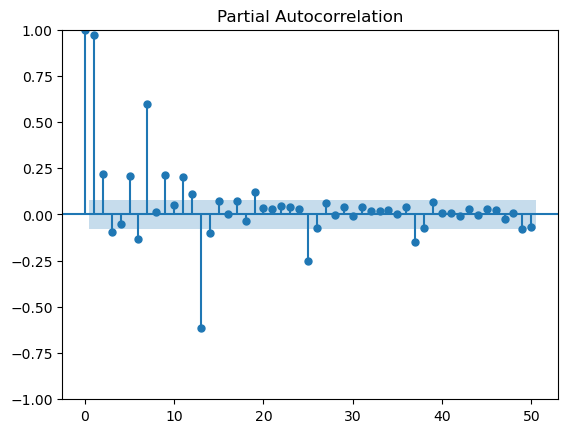

In [16]:
# Autocorrelation plot
plt.figure(figsize=(10,6))
plot_acf(data['TRFVOLUSM227NFWA'], lags=50)
plt.show()

# Partial autocorrelation plot
plt.figure(figsize=(10,6))
plot_pacf(data['TRFVOLUSM227NFWA'], lags=50)
plt.show()


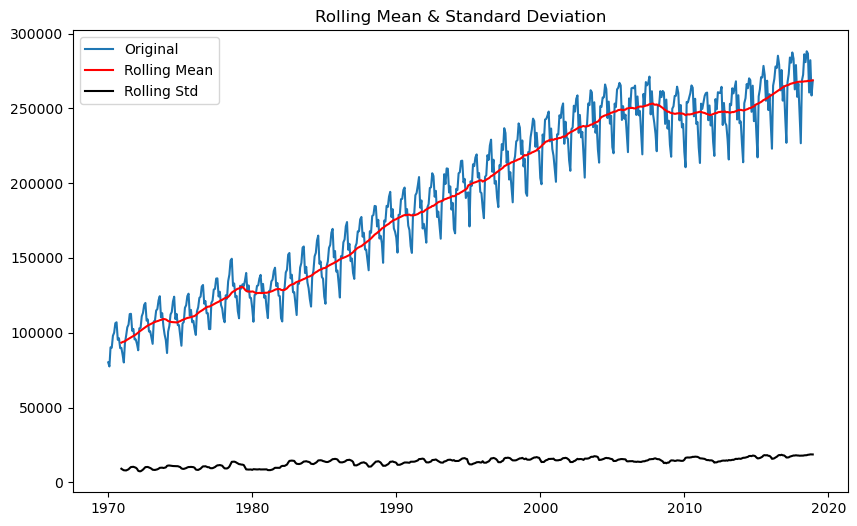

In [18]:
rolling_mean = data['TRFVOLUSM227NFWA'].rolling(window=12).mean()
rolling_std = data['TRFVOLUSM227NFWA'].rolling(window=12).std()

plt.figure(figsize=(10,6))
plt.plot(data['TRFVOLUSM227NFWA'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='black')
plt.title('Rolling Mean & Standard Deviation')
plt.legend()
plt.show()


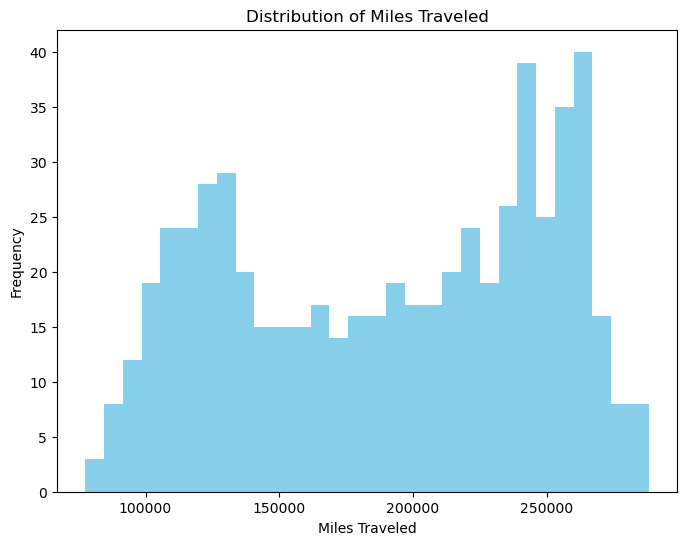

In [20]:
plt.figure(figsize=(8,6))
plt.hist(data['TRFVOLUSM227NFWA'], bins=30, color='skyblue')
plt.title('Distribution of Miles Traveled')
plt.xlabel('Miles Traveled')
plt.ylabel('Frequency')
plt.show()


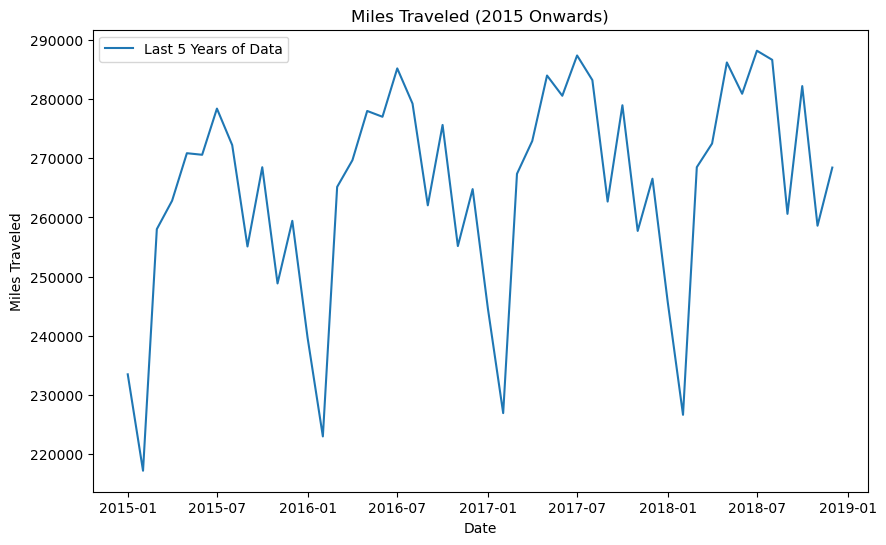

In [22]:
# Zoom in on the last 5 years of data (example)
plt.figure(figsize=(10,6))
plt.plot(data['2015-01-01':], label='Last 5 Years of Data')
plt.title('Miles Traveled (2015 Onwards)')
plt.xlabel('Date')
plt.ylabel('Miles Traveled')
plt.legend()
plt.show()


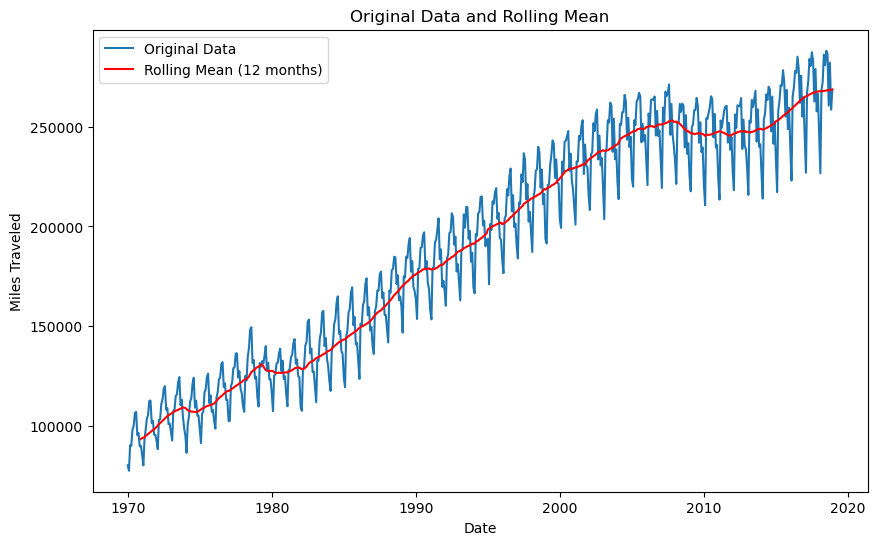

In [24]:
plt.figure(figsize=(10,6))
data['Rolling Mean'] = data['TRFVOLUSM227NFWA'].rolling(window=12).mean()
plt.plot(data.index, data['TRFVOLUSM227NFWA'], label='Original Data')
plt.plot(data.index, data['Rolling Mean'], color='red', label='Rolling Mean (12 months)')
plt.title('Original Data and Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Miles Traveled')
plt.legend()
plt.show()